## The arrests made by the Baltimore Police Department, you can find the data from [here](https://www.kaggle.com/arathee2/arrests-by-baltimore-police-department).

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from matplotlib import cm

%matplotlib inline

data = pd.read_csv('BPD_Arrests.csv')
data.head(3)

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1
0,16160529.0,54.0,M,B,11/12/2016,22:35,3500 PELHAM AVE,4ECOMMON ASSAULT,3500 PELHAM AVE,1 1415,COMMON ASSAULT,Northeastern,432.0,Belair-Edison,"(39.3208685519, -76.5652449141)"
1,16160490.0,22.0,M,B,11/12/2016,21:49,300 S LOUDON AVE,Unknown Offense,300 S LOUDON AVE,4 3550,POSSESSION,Southwestern,833.0,Irvington,"(39.2811486601, -76.6821278085)"
2,16160487.0,31.0,M,B,11/12/2016,21:40,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN


In [36]:
# check the dimension
data.shape

(130713, 15)

In [37]:
# check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130713 entries, 0 to 130712
Data columns (total 15 columns):
Arrest               123699 non-null float64
Age                  130685 non-null float64
Sex                  130713 non-null object
Race                 130713 non-null object
ArrestDate           130713 non-null object
ArrestTime           130713 non-null object
ArrestLocation       78595 non-null object
IncidentOffense      130713 non-null object
IncidentLocation     76987 non-null object
Charge               114255 non-null object
ChargeDescription    130211 non-null object
District             78601 non-null object
Post                 78583 non-null float64
Neighborhood         78595 non-null object
Location 1           78666 non-null object
dtypes: float64(3), object(12)
memory usage: 15.0+ MB


We can see that there are some columns missing data.

# Arrest by Gender

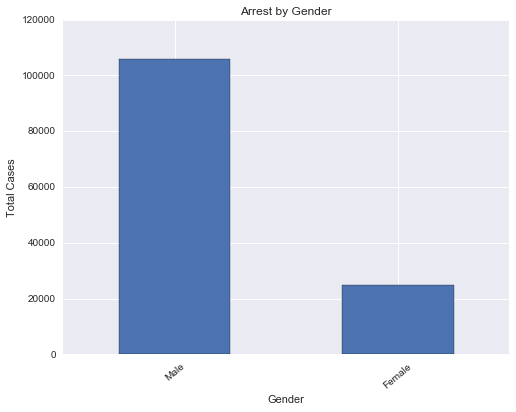

In [38]:
dt_sex = data.Sex.value_counts()

fig = plt.figure(figsize=(8,6))
dt_sex.plot(kind='bar')

plt.title('Arrest by Gender')
plt.ylabel('Total Cases')
plt.xlabel('Gender')
plt.xticks(range(2), ('Male', 'Female'), rotation=40)
plt.show()

# Arrest by Race

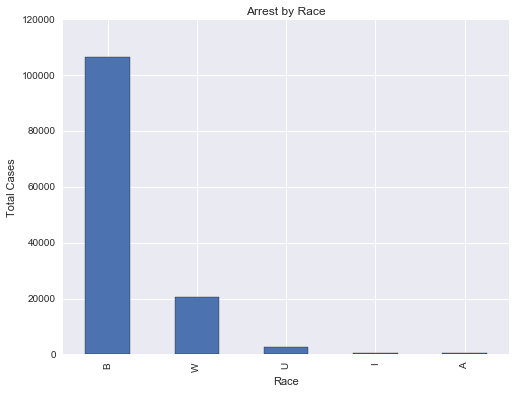

In [39]:
dt_race = data.Race.value_counts()

fig = plt.figure(figsize=(8,6))
dt_race.plot(kind='bar')

plt.title('Arrest by Race')
plt.ylabel('Total Cases')
plt.xlabel('Race')
plt.show()

# Arrest by Age

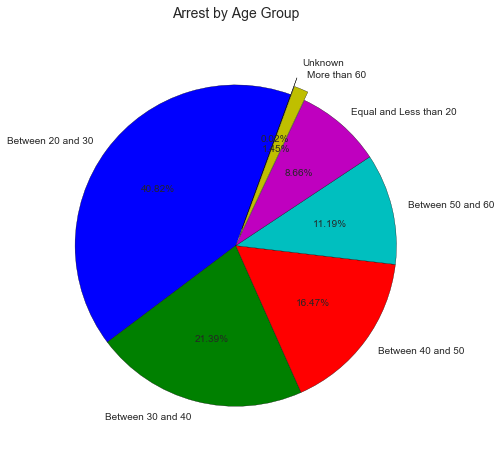

In [40]:
def age_bucket(x):
    if x <= 20:
        return "less than 20"
    elif x <= 30:
        return "between 20 and 30"
    elif x <= 40:
        return "between 30 and 40"
    elif x <= 50:
        return "between 40 and 50"
    elif x <= 60:
        return "between 50 and 60"    
    elif x > 60:
        return "60 and older "        
    else:
        return "Unknown"

dt_age = data.Age.map(lambda x: age_bucket(x)).value_counts()   

fig = plt.figure(figsize=(8,8))
labels=('Between 20 and 30', 'Between 30 and 40', 'Between 40 and 50', 'Between 50 and 60', 'Equal and Less than 20',\
        'More than 60', 'Unknown')
plt.pie(dt_age,explode=(0, 0, 0, 0, 0,0.05,0.1), autopct='%1.2f%%', shadow=False, labels=labels, \
       startangle=70,radius=.9 )
plt.title('Arrest by Age Group', fontsize=14)
plt.show()

# Arrest by Year

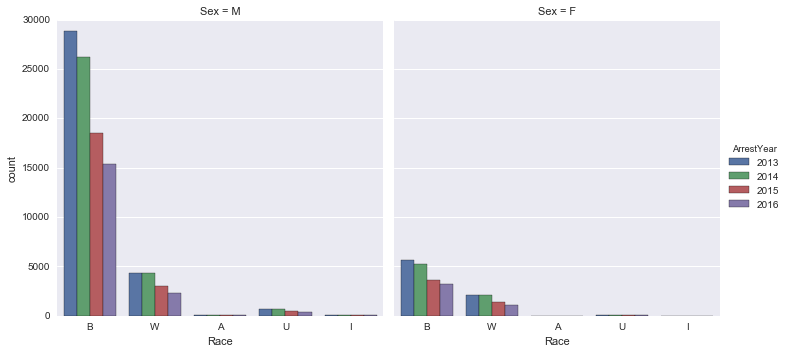

In [41]:
from datetime import datetime
data['ArrestYear'] =data.ArrestDate.map(lambda x: datetime.strptime(x, '%m/%d/%Y').year)
data['ArrestMonth'] =data.ArrestDate.map(lambda x: datetime.strptime(x, '%m/%d/%Y').month)

sns.factorplot(hue='ArrestYear', x='Race', col='Sex', data=data, kind='count',size=5 )

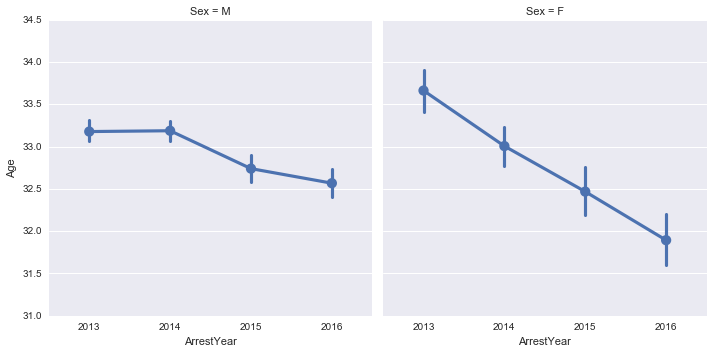

In [42]:
dt = data[data['Age']!=0]
sns.factorplot(data=data, x="ArrestYear", col="Sex", y='Age', size=5)  

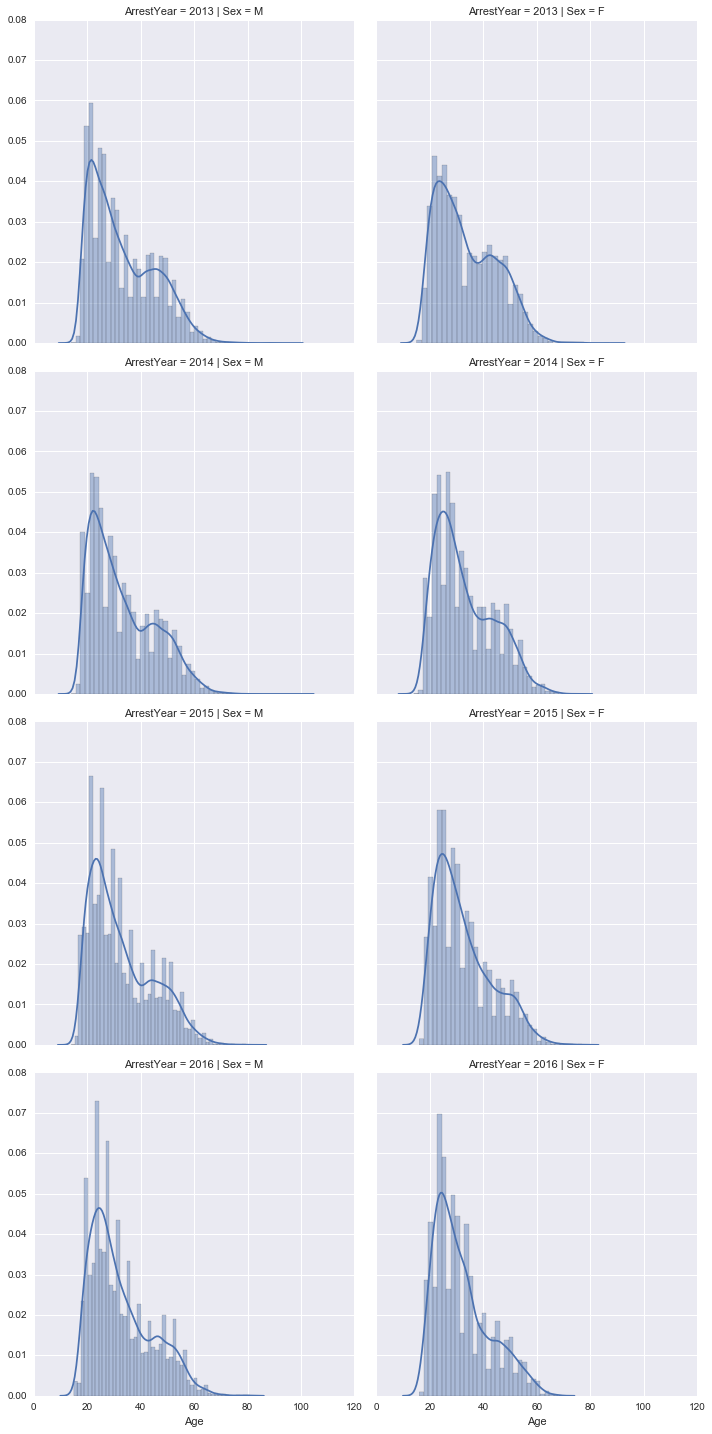

In [43]:
g = sns.FacetGrid(dt, row='ArrestYear', col="Sex", size=5)  
g.map(sns.distplot, "Age")  

# Arrest by District

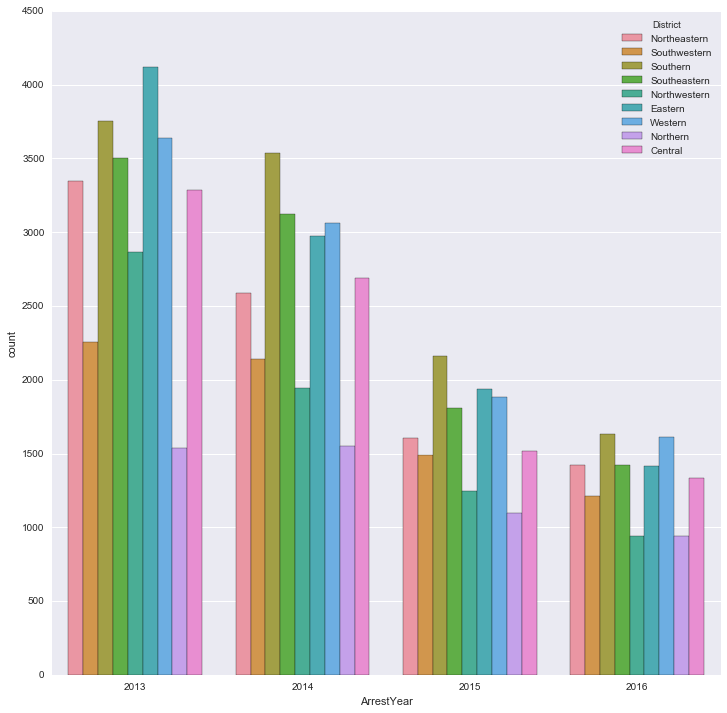

In [44]:
dt_district = data[data['District'].notnull()]
sns.factorplot(x='ArrestYear', hue='District', data=dt_district, kind='count', legend_out=False, size=10)

For seaborn plotting, please refer [here](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/) and [here](http://seaborn.pydata.org/index.html#)

# Arrest by Locations

In [45]:
# process the data
locs = data['Location 1'][data['Location 1'].notnull()] 
locs_lon=[]
locs_lat=[]

for loc in locs:
    lat, lon = loc[1:-1].split(', ')
    locs_lon.append(float(lon))
    locs_lat.append(float(lat))

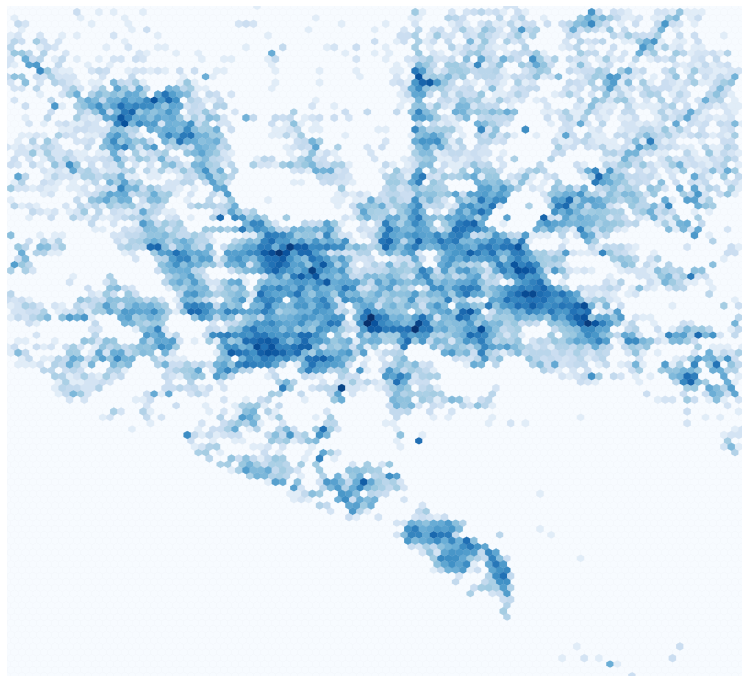

In [46]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = min(locs_lon), min(locs_lat), max(locs_lon), max(locs_lat)
 
fig = plt.figure(figsize=(14,12))
m = Basemap(projection='gall', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='l')
x, y = m(pd.Series(locs_lon).values, pd.Series(locs_lat).values)
m.hexbin(x, y, gridsize=100, bins='log', cmap=cm.Blues);

In [62]:
arrest_heatmap = folium.Map(location=[(min(locs_lat)+max(locs_lat))/2, (min(locs_lon)+max(locs_lon))/2], zoom_start=11)
arrest_heatmap.add_children(plugins.HeatMap([[lat, lon] for lat, lon in zip(locs_lat[:5000],locs_lon[:5000])]))
#arrest_heatmap.save("heatmap.html")
arrest_heatmap                            

For folium documentation, please refer [here](https://github.com/python-visualization/folium)